# Frequent Topics

## Setup and Installation

In [3]:
%pip install -q wordcloud matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from collections import defaultdict
from bertopic import BERTopic
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Loading the Topic Model

In [1]:
topic_model = BERTopic.load("../../exploratory_data_analytics/topic_modeling/bertopic_model.pkl")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Calculating Topic Frequencies

In [2]:
# Get all topic IDs, excluding outlier
topic_ids = [t for t in topic_model.get_topic_info().Topic if t != -1]

# Aggregate word scores across all topics
word_global_score = defaultdict(float)

for topic_id in topic_ids:
    for word, score in topic_model.get_topic(topic_id):
        word_global_score[word] += score

# Sort and display top representative words
top_global_words = sorted(word_global_score.items(), key=lambda x: x[1], reverse=True)
for word, total_score in top_global_words[:10]:
    print(f"{word}: {total_score:.4f}")

cave: 0.2252
feature: 0.1266
image: 0.1266
tab: 0.1266
look: 0.1072
fossil: 0.0928
article: 0.0857
roof: 0.0833
hole: 0.0833
opera: 0.0802


## Drawing Word Clouds

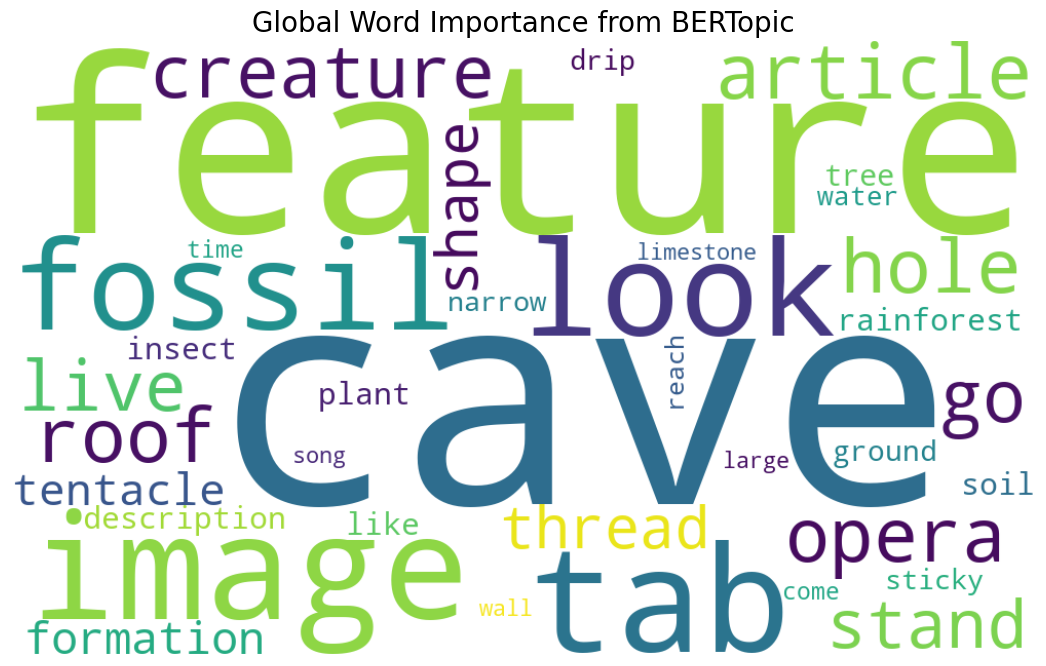

In [7]:
wc = WordCloud(width=1000, height=600, background_color="white")
wc.generate_from_frequencies(word_global_score)

plt.figure(figsize=(14, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Global Word Importance from BERTopic", fontsize=20)
plt.show()